Summary on online property findings

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from property import *
from accumulate_data import get_averages, read_historical_data

0it [00:00, ?it/s]
 71%|███████   | 12/17 [01:11<00:27,  5.40s/it]

`https://ingatlan.com/algyo/elado+haz/csaladi-haz/csongrad+megye+algyo/30496108` has some issues to provide advertiser details!


  8%|▊         | 3/40 [00:26<06:35, 10.68s/it]

`https://ingatlan.com/morahalom/elado+haz/tanya/csongrad+megye+morahalom/29774342` has some issues to provide advertiser details!


 35%|███▌      | 14/40 [01:22<02:10,  5.00s/it]

`https://ingatlan.com/morahalom-felsovaros/elado+haz/csaladi-haz/csongrad+megye+morahalom/27352365` has some issues to provide advertiser details!


  0%|          | 0/99 [00:00<?, ?it/s]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


  1%|          | 1/99 [00:11<18:06, 11.09s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


  2%|▏         | 2/99 [00:15<14:53,  9.21s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


  3%|▎         | 3/99 [00:21<12:49,  8.01s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


  4%|▍         | 4/99 [00:26<11:13,  7.09s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


  5%|▌         | 5/99 [00:31<10:21,  6.62s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


  6%|▌         | 6/99 [00:36<09:33,  6.17s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


  7%|▋         | 7/99 [00:41<08:55,  5.82s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


  8%|▊         | 8/99 [00:46<08:20,  5.50s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


  9%|▉         | 9/99 [00:51<08:12,  5.47s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 10%|█         | 10/99 [00:56<07:48,  5.26s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 11%|█         | 11/99 [01:01<07:28,  5.09s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 12%|█▏        | 12/99 [01:06<07:24,  5.11s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 13%|█▎        | 13/99 [01:11<07:17,  5.08s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 14%|█▍        | 14/99 [01:16<07:13,  5.10s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 15%|█▌        | 15/99 [01:21<06:59,  4.99s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 16%|█▌        | 16/99 [01:26<06:55,  5.01s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 17%|█▋        | 17/99 [01:30<06:36,  4.84s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 18%|█▊        | 18/99 [01:35<06:22,  4.73s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 19%|█▉        | 19/99 [01:40<06:16,  4.71s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 20%|██        | 20/99 [01:45<06:19,  4.80s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 21%|██        | 21/99 [01:49<06:14,  4.80s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 22%|██▏       | 22/99 [01:54<06:09,  4.80s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 23%|██▎       | 23/99 [01:59<06:01,  4.76s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 24%|██▍       | 24/99 [02:03<05:55,  4.73s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+rona+utca/30568288` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 25%|██▌       | 25/99 [02:09<05:59,  4.86s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 26%|██▋       | 26/99 [02:13<05:52,  4.83s/it]

`https://ingatlan.com/szeged/elado+garazs/teremgarazs/csongrad+megye+szeged+tompai+kapu+ut+2b/30521851` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 27%|██▋       | 27/99 [02:18<05:49,  4.86s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 28%|██▊       | 28/99 [02:23<05:39,  4.78s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+romai+korut/30437149` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 29%|██▉       | 29/99 [02:28<05:38,  4.83s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+kalvaria+sugarut+92-94/30434056` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 30%|███       | 30/99 [02:33<05:32,  4.81s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 31%|███▏      | 31/99 [02:38<05:31,  4.88s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 32%|███▏      | 32/99 [02:43<05:27,  4.88s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 33%|███▎      | 33/99 [02:47<05:20,  4.85s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+dugonics+utca/30335507` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 34%|███▍      | 34/99 [02:53<05:24,  5.00s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 35%|███▌      | 35/99 [02:57<05:12,  4.88s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+fakopancs+utca/30314270` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 36%|███▋      | 36/99 [03:02<05:11,  4.95s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 37%|███▋      | 37/99 [03:07<05:00,  4.85s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 38%|███▊      | 38/99 [03:12<04:54,  4.83s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+allomas+utca/30046589` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 39%|███▉      | 39/99 [03:17<04:50,  4.84s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+tisza+lajos+korut+18-20/29968853` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 40%|████      | 40/99 [03:22<04:46,  4.86s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 41%|████▏     | 41/99 [03:27<04:46,  4.93s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 42%|████▏     | 42/99 [03:32<04:44,  4.99s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 43%|████▎     | 43/99 [03:37<04:41,  5.03s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 44%|████▍     | 44/99 [03:42<04:38,  5.07s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 45%|████▌     | 45/99 [03:47<04:36,  5.13s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 46%|████▋     | 46/99 [03:52<04:29,  5.09s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 47%|████▋     | 47/99 [03:59<04:42,  5.43s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 48%|████▊     | 48/99 [04:03<04:27,  5.25s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 49%|████▉     | 49/99 [04:08<04:17,  5.14s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 51%|█████     | 50/99 [04:14<04:14,  5.20s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 52%|█████▏    | 51/99 [04:19<04:06,  5.13s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 53%|█████▎    | 52/99 [04:23<03:55,  5.01s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+hajnal+utca/29467505` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 54%|█████▎    | 53/99 [04:28<03:49,  5.00s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 55%|█████▍    | 54/99 [04:33<03:44,  4.99s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 56%|█████▌    | 55/99 [04:38<03:40,  5.02s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 57%|█████▋    | 56/99 [04:43<03:32,  4.95s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 58%|█████▊    | 57/99 [04:48<03:23,  4.85s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 59%|█████▊    | 58/99 [04:53<03:18,  4.85s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 60%|█████▉    | 59/99 [04:58<03:17,  4.94s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 61%|██████    | 60/99 [05:03<03:20,  5.13s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+veres+acs+utca+49/29216258` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 62%|██████▏   | 61/99 [05:08<03:13,  5.09s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 63%|██████▎   | 62/99 [05:13<03:04,  4.98s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 64%|██████▎   | 63/99 [05:18<02:58,  4.97s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 65%|██████▍   | 64/99 [05:23<02:53,  4.94s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 66%|██████▌   | 65/99 [05:28<02:48,  4.95s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 67%|██████▋   | 66/99 [05:33<02:42,  4.94s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+becsi+korut/28333955` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 68%|██████▊   | 67/99 [05:38<02:45,  5.18s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 69%|██████▊   | 68/99 [05:43<02:38,  5.12s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 70%|██████▉   | 69/99 [05:48<02:31,  5.04s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 71%|███████   | 70/99 [05:53<02:26,  5.06s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 72%|███████▏  | 71/99 [05:59<02:23,  5.11s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 73%|███████▎  | 72/99 [06:03<02:14,  4.99s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 74%|███████▎  | 73/99 [06:08<02:09,  4.98s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 75%|███████▍  | 74/99 [06:13<02:03,  4.95s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 76%|███████▌  | 75/99 [06:18<02:01,  5.04s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 77%|███████▋  | 76/99 [06:23<01:55,  5.01s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 78%|███████▊  | 77/99 [06:29<01:52,  5.11s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 79%|███████▉  | 78/99 [06:34<01:47,  5.11s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 80%|███████▉  | 79/99 [06:39<01:41,  5.06s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 81%|████████  | 80/99 [06:43<01:33,  4.93s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+rona+utca/30845398` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 82%|████████▏ | 81/99 [06:48<01:27,  4.88s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 83%|████████▎ | 82/99 [06:53<01:23,  4.91s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 84%|████████▍ | 83/99 [06:58<01:18,  4.89s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 85%|████████▍ | 84/99 [07:03<01:14,  5.00s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 86%|████████▌ | 85/99 [07:09<01:11,  5.13s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 87%|████████▋ | 86/99 [07:14<01:05,  5.06s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 88%|████████▊ | 87/99 [07:19<01:01,  5.11s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 89%|████████▉ | 88/99 [07:23<00:54,  4.95s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 90%|████████▉ | 89/99 [07:28<00:48,  4.88s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+halo+utca/30951286` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 91%|█████████ | 90/99 [07:33<00:44,  4.92s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+gondor+sor+j/30925450` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 92%|█████████▏| 91/99 [07:37<00:37,  4.73s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+halo+utca/30918352` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 93%|█████████▎| 92/99 [07:42<00:33,  4.73s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+szovetkezeti+ut/30914362` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 94%|█████████▍| 93/99 [07:47<00:28,  4.77s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 95%|█████████▍| 94/99 [07:52<00:24,  4.84s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 96%|█████████▌| 95/99 [07:57<00:19,  4.76s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+debreceni+utca/30890884` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 97%|█████████▋| 96/99 [08:02<00:14,  4.88s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 98%|█████████▊| 97/99 [08:07<00:09,  4.96s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 99%|█████████▉| 98/99 [08:13<00:05,  5.35s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


100%|██████████| 99/99 [08:18<00:00,  5.03s/it]
/home/diveki/Programok/Python/Projects/Property-finder/accumulate_data.py:36: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat([df, tmp])


KeyError: "['Date', 'garage', 'street'] not in index"

In [5]:
%run accumulate_data.py

0it [00:00, ?it/s]
 78%|███████▊  | 31/40 [03:01<01:04,  7.15s/it]

`https://ingatlan.com/morahalom/elado+haz/csaladi-haz/csongrad+megye+morahalom+ii+korzet/30600313` has some issues to provide advertiser details!


 98%|█████████▊| 39/40 [03:46<00:05,  5.61s/it]

`https://ingatlan.com/morahalom/elado+haz/tanya/csongrad+megye+morahalom/30035162` has some issues to provide advertiser details!


  0%|          | 0/99 [00:00<?, ?it/s]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


  1%|          | 1/99 [00:08<14:29,  8.87s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


  2%|▏         | 2/99 [00:14<12:32,  7.76s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


  3%|▎         | 3/99 [00:19<11:24,  7.13s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


  4%|▍         | 4/99 [00:24<10:19,  6.52s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+vasas+szent+peter+utca/30766795` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


  5%|▌         | 5/99 [00:29<09:27,  6.04s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


  6%|▌         | 6/99 [00:34<08:47,  5.67s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


  7%|▋         | 7/99 [00:40<08:40,  5.66s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


  8%|▊         | 8/99 [00:45<08:29,  5.59s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


  9%|▉         | 9/99 [00:51<08:21,  5.58s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 10%|█         | 10/99 [00:56<08:10,  5.51s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 11%|█         | 11/99 [01:01<08:00,  5.47s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 12%|█▏        | 12/99 [01:06<07:38,  5.27s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 13%|█▎        | 13/99 [01:11<07:27,  5.21s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 14%|█▍        | 14/99 [01:16<07:13,  5.10s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 15%|█▌        | 15/99 [01:21<07:11,  5.14s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 16%|█▌        | 16/99 [01:26<07:06,  5.14s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 17%|█▋        | 17/99 [01:31<06:55,  5.07s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 18%|█▊        | 18/99 [01:36<06:45,  5.01s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 19%|█▉        | 19/99 [01:41<06:40,  5.00s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 20%|██        | 20/99 [01:46<06:29,  4.92s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 21%|██        | 21/99 [01:51<06:19,  4.87s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 22%|██▏       | 22/99 [01:56<06:19,  4.92s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 23%|██▎       | 23/99 [02:01<06:22,  5.03s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 24%|██▍       | 24/99 [02:06<06:17,  5.03s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+rona+utca/30568288` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 25%|██▌       | 25/99 [02:11<06:13,  5.05s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 26%|██▋       | 26/99 [02:16<06:10,  5.07s/it]

`https://ingatlan.com/szeged/elado+garazs/teremgarazs/csongrad+megye+szeged+tompai+kapu+ut+2b/30521851` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 27%|██▋       | 27/99 [02:21<06:01,  5.03s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 28%|██▊       | 28/99 [02:26<05:46,  4.88s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+romai+korut/30437149` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 29%|██▉       | 29/99 [02:30<05:32,  4.74s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+kalvaria+sugarut+92-94/30434056` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 30%|███       | 30/99 [02:35<05:26,  4.74s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+makkoserdo+sor/30418732` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 31%|███▏      | 31/99 [02:41<05:41,  5.02s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 32%|███▏      | 32/99 [02:45<05:32,  4.96s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 33%|███▎      | 33/99 [02:50<05:26,  4.94s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+dugonics+utca/30335507` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 34%|███▍      | 34/99 [02:56<05:28,  5.05s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 35%|███▌      | 35/99 [03:01<05:21,  5.03s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+fakopancs+utca/30314270` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 36%|███▋      | 36/99 [03:06<05:17,  5.04s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 37%|███▋      | 37/99 [03:10<05:00,  4.85s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 38%|███▊      | 38/99 [03:14<04:46,  4.70s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+allomas+utca/30046589` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 39%|███▉      | 39/99 [03:19<04:46,  4.77s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+tisza+lajos+korut+18-20/29968853` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 40%|████      | 40/99 [03:25<04:49,  4.91s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 41%|████▏     | 41/99 [03:29<04:40,  4.83s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 42%|████▏     | 42/99 [03:34<04:29,  4.74s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 43%|████▎     | 43/99 [03:39<04:27,  4.78s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 44%|████▍     | 44/99 [03:43<04:23,  4.80s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 45%|████▌     | 45/99 [03:48<04:17,  4.77s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 46%|████▋     | 46/99 [03:54<04:35,  5.21s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 47%|████▋     | 47/99 [04:00<04:30,  5.20s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 48%|████▊     | 48/99 [04:05<04:26,  5.22s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 49%|████▉     | 49/99 [04:10<04:14,  5.09s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 51%|█████     | 50/99 [04:15<04:07,  5.05s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 52%|█████▏    | 51/99 [04:20<04:07,  5.15s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 53%|█████▎    | 52/99 [04:25<04:06,  5.25s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+hajnal+utca/29467505` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 54%|█████▎    | 53/99 [04:31<04:03,  5.29s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 55%|█████▍    | 54/99 [04:36<03:59,  5.33s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 56%|█████▌    | 55/99 [04:41<03:51,  5.26s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 57%|█████▋    | 56/99 [04:46<03:42,  5.17s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 58%|█████▊    | 57/99 [04:52<03:42,  5.30s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 59%|█████▊    | 58/99 [04:57<03:29,  5.11s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 60%|█████▉    | 59/99 [05:02<03:24,  5.11s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 61%|██████    | 60/99 [05:07<03:19,  5.12s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+veres+acs+utca+49/29216258` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 62%|██████▏   | 61/99 [05:12<03:10,  5.01s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 63%|██████▎   | 62/99 [05:16<03:03,  4.96s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 64%|██████▎   | 63/99 [05:21<02:58,  4.96s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 65%|██████▍   | 64/99 [05:27<02:56,  5.05s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 66%|██████▌   | 65/99 [05:31<02:48,  4.95s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 67%|██████▋   | 66/99 [05:36<02:42,  4.94s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 68%|██████▊   | 67/99 [05:41<02:37,  4.92s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 69%|██████▊   | 68/99 [05:46<02:35,  5.02s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 70%|██████▉   | 69/99 [05:51<02:30,  5.03s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 71%|███████   | 70/99 [05:57<02:30,  5.19s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 72%|███████▏  | 71/99 [06:02<02:24,  5.18s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 73%|███████▎  | 72/99 [06:07<02:20,  5.20s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 74%|███████▎  | 73/99 [06:13<02:15,  5.20s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 75%|███████▍  | 74/99 [06:18<02:09,  5.17s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 76%|███████▌  | 75/99 [06:23<02:04,  5.21s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 77%|███████▋  | 76/99 [06:28<01:59,  5.18s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 78%|███████▊  | 77/99 [06:34<01:58,  5.37s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 79%|███████▉  | 78/99 [06:41<02:00,  5.75s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 80%|███████▉  | 79/99 [06:45<01:49,  5.46s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+felso+tisza+part/21196606` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 81%|████████  | 80/99 [06:50<01:38,  5.21s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+rona+utca/30845398` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 82%|████████▏ | 81/99 [06:55<01:34,  5.24s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 83%|████████▎ | 82/99 [07:03<01:39,  5.88s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 84%|████████▍ | 83/99 [07:08<01:33,  5.83s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 85%|████████▍ | 84/99 [07:13<01:24,  5.63s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 86%|████████▌ | 85/99 [07:19<01:19,  5.71s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+veres+acs+utca+49/30701422` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 87%|████████▋ | 86/99 [07:25<01:13,  5.64s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 88%|████████▊ | 87/99 [07:31<01:09,  5.76s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 89%|████████▉ | 88/99 [07:38<01:07,  6.10s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 90%|████████▉ | 89/99 [07:45<01:03,  6.30s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+halo+utca/30951286` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 91%|█████████ | 90/99 [07:56<01:10,  7.86s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+gondor+sor+j/30925450` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 92%|█████████▏| 91/99 [08:02<00:58,  7.33s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+halo+utca/30918352` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 93%|█████████▎| 92/99 [08:09<00:49,  7.07s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+szovetkezeti+ut/30914362` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 94%|█████████▍| 93/99 [08:16<00:42,  7.03s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 95%|█████████▍| 94/99 [08:22<00:33,  6.72s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 96%|█████████▌| 95/99 [08:28<00:26,  6.55s/it]

`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+debreceni+utca/30890884` has some issues to provide advertiser details!
`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 97%|█████████▋| 96/99 [08:34<00:19,  6.60s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 98%|█████████▊| 97/99 [08:41<00:13,  6.70s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


 99%|█████████▉| 98/99 [08:48<00:06,  6.61s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found


100%|██████████| 99/99 [08:54<00:00,  5.39s/it]
/home/diveki/Programok/Python/Projects/Property-finder/accumulate_data.py:36: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat([df, tmp])


KeyError: "['Date', 'garage', 'street'] not in index"

In [13]:
def read_historical_data(fname):
    av_hist = pd.read_excel(fname)
    av_hist = av_hist.set_index('Date')
    colnames = av_hist.columns
    return av_hist, colnames


In [17]:
av_hist, avhist_colnames = read_historical_data('averages.xlsx')

### Calculate stats on the properties
av = get_averages(df)
av = av.loc[:,avhist_colnames]


In [19]:
av = pd.concat([av_hist, av], sort=False)


In [20]:
av

,city,type,size,street,price,unit_price,land_size,garage
Date,,,,,,,,
2020-01-11 21:12:52.639000,Algyo,House,118.882353,NaN,3.000294e+07,278100.389936,NaN,NaN
2020-01-11 21:12:52.639000,Morahalom,House,118.179487,NaN,2.486410e+07,215486.314279,NaN,NaN
2020-01-11 21:12:52.639000,Szeged,Garage,17.755102,NaN,4.165918e+06,242099.910224,NaN,NaN
2020-01-11 21:12:52.639000,Szeged,House,160.991162,NaN,5.492939e+07,992379.652400,470.023990,NaN
2020-01-12 18:35:12.534301,Algyo,House,118.882353,NaN,3.000294e+07,278100.389936,523.470588,NaN
2020-01-12 18:35:12.534301,Morahalom,House,117.475000,NaN,2.473250e+07,215543.600866,157.050000,NaN
2020-01-12 18:35:12.534301,Szeged,Garage,17.727273,NaN,4.149091e+06,241337.958269,NaN,NaN


# Property characteristics over time

## Average house prices

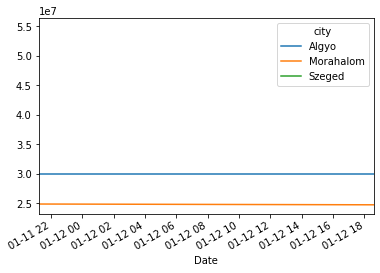

In [26]:
av_price=pd.pivot(av[av.type=='House'].reset_index(), index='Date', values='price', columns='city')
av_price.plot()

## Average flat prices

In [ ]:
av_price=pd.pivot(av[av.type=='Flat'].reset_index(), index='Date', values='price', columns='city')
av_price.plot()

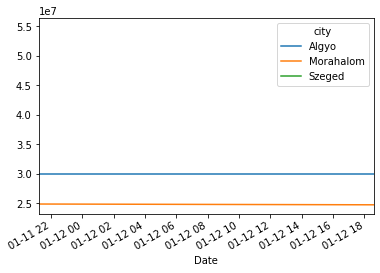